In [1]:
import sys
import platform
import torch
import pandas as pd
import sklearn as sk

has_gpu = torch.cuda.is_available()
#has_mps = torch.backends.mps.is_built()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Target device is {device}")

Target device is cuda


In [3]:
!pip install imbalanced-learn

In [2]:
#path="/Users/chaitanyadua/Downloads/folder5"
data_path = "C:\\Users\\Shobhit\\Desktop\\IIITacad\\Sem6\\ML_project\\Combined_images\\"
csv_path = "C:\\Users\\Shobhit\\Desktop\\IIITacad\\Sem6\\ML_project\\final.csv"
csv_path2 = "C:\\Users\\Shobhit\\Desktop\\IIITacad\\Sem6\\ML_project\\JustRAIGS_Train_labels.csv"

In [3]:
import os
folder_path = '/Users/chaitanyadua/Downloads/folder5'

image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.JPG') or f.endswith('.png')])
'''
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)
'''

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/chaitanyadua/Downloads/folder5'

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import numpy as np
import pandas as pd
import torch.optim as optimizers
import matplotlib.pyplot as mtb
from sklearn.metrics import precision_score,recall_score


In [4]:
# Data loading and preprocessing
class GlaucomaDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [5]:
#import data into dataframes
#data_path = "/Users/chaitanyadua/Downloads/folder5/"
df = pd.read_csv(csv_path2, sep=';', low_memory=False)
df['Final Label'] = df['Final Label'].replace({'RG': 1, 'NRG': 0})
final_label = df['Final Label'].values

In [6]:
#create training and validation dataframes
# images = []
# labels = []

# glaucoma_pictures = sorted([f for f in os.listdir(data_path) if f.endswith('.JPG') or f.endswith('.png')])
# glaucoma_pictures=glaucoma_pictures[:90000]
# ct = 0
# for image in glaucoma_pictures:
#     ct = ct + 1
#     print(ct)
#     image_name2=image[:-4]
#     image_path=data_path+image
#     images.append(image_path)
#     row = df[df['Eye ID'] == image_name2]
#     labels.append(row.iloc[0]['Final Label'])
# print(len(images))
# print(len(labels))
# # Split data into train and validation sets
# train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, stratify=labels)
# print(len(train_images))
images = []
labels = []
ct_rg=0
ct_nrg=0
glaucoma_pictures = sorted([f for f in os.listdir(data_path) if f.endswith('.JPG') or f.endswith('.png')])
glaucoma_pictures=glaucoma_pictures
for image in glaucoma_pictures:
    image_name2=image[:-4]
    image_path=data_path+image
    row = df[df['Eye ID'] == image_name2]
    if row['Final Label'].item()==1:
        ct_rg+=1
        images.append(image_path)
        labels.append(row.iloc[0]['Final Label'])
    elif row['Final Label'].item()==0:
        if ct_nrg<ct_rg:
            ct_nrg+=1
            images.append(image_path)
            labels.append(row.iloc[0]['Final Label'])
print(ct_nrg)
print(ct_rg)
print(len(images))
print(len(labels))
# Split data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, stratify=labels)
print(len(train_images))

3269
3269
6538
6538
5230


In [7]:
# Define data transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
# Create PyTorch datasets
train_dataset = GlaucomaDataset(train_images, train_labels, transform=train_transform)
val_dataset = GlaucomaDataset(val_images, val_labels, transform=val_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
for inputs, labels in train_loader:
    print("Input batch shape:", inputs.shape)
    print("Labels batch shape:", labels.shape)
    break  # Print only the shape of the first batch


Input batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: torch.Size([8])


In [61]:
# def train_model(num_epochs,model,train_loader,my_optimizer,loss_criterion):
#     model.to(device)
#     for epoch in range(num_epochs):
#         model.train()
#         train_loss=0.0
#         val_loss=0.0
#         correctly_predicted=0
#         correctly_predicted_val=0
#         for images,labels in train_loader:
#             images=images.to(device)
#             labels=labels.to(device)
#             outputs=model(images)
#             #outputs is of shape number of samples times number of classes
#             labels=labels.to(torch.int32)
#             loss=loss_criterion(outputs,labels)
#             my_optimizer.zero_grad()
#             loss.backward()
#             my_optimizer.step()
#             train_loss+=loss.item()*images.shape[0]
#             highest,prediction_indexes=torch.max(outputs,1)
#             correctly_predicted+=(prediction_indexes==labels).sum().item()
#         model.eval()
#         with torch.no_grad():
#             for images,labels in val_loader:
#                 images=images.to(device)
#                 labels=labels.to(device)
#                 outputs=model(images)
#                 labels=labels.to(torch.int32)
#                 loss=loss_criterion(outputs,labels)
#                 val_loss+=loss.item()*images.shape[0]
#                 highest,prediction_indexes=torch.max(outputs,1)
#                 correctly_predicted_val+=(prediction_indexes==labels).sum().item()
#         train_loss/=(len(train_images))
#         val_loss/=(len(val_images))
#         accuracy=(correctly_predicted/len(train_images))
#         accuracy_val=(correctly_predicted_val/len(val_images))
#         print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy_val:.4f}")

In [9]:
#define train_model_2
def train_model_2(num_epochs,model,train_loader,my_optimizer,loss_criterion):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        train_loss=0.0
        val_loss=0.0
        # correctly_predicted=0
        # correctly_predicted_val=0
        true_positives=0
        true_negatives=0
        false_positives=0
        false_negatives=0
        predicted_positives=0
        true_positives_val=0
        true_negatives_val=0
        false_positives_val=0
        false_negatives_val=0
        predicted_positives_val=0
        custom_threshold=0.5 #HYPER-PARAMETER
        for images,labels in train_loader:
            images=images.to(device)
            labels=labels.to(device)
            outputs=model(images)
            #outputs = outputs.squeeze()
            #print(outputs.shape, labels.shape, outputs)
            #outputs is of shape number of samples times number of classes
            # labels=labels.to(torch.int32)
            loss=loss_criterion(outputs,labels)
            my_optimizer.zero_grad()
            loss.backward()
            my_optimizer.step()
            train_loss+=loss.item()*images.shape[0]
            highest,prediction_indexes=torch.max(outputs,1)
            true_positives += ((prediction_indexes == 1) & (labels == 1)).sum().item()
            true_negatives+= ((prediction_indexes == 0) & (labels == 0)).sum().item()
            false_positives+=((prediction_indexes == 1) & (labels == 0)).sum().item()
            false_negatives += ((prediction_indexes == 0) & (labels == 1)).sum().item()
            # predicted_positives += (prediction_indexes == 1).sum().item()
            # probabilities = torch.sigmoid(outputs)
            # predictions = (probabilities > custom_threshold).long()
            # true_positives += ((predictions[:,1]==1) & (labels == 1)).sum().item()
            # true_negatives += ((predictions[:,0]==1) & (labels == 0)).sum().item()
            # false_positives += ((predictions[:,1]==1) & (labels == 0)).sum().item()
            # false_negatives += ((predictions[:,0]==1) & (labels == 1)).sum().item()
            # predicted_positives += predictions.sum().item()

        train_specificity = 0
        train_senstivity = 0
        if (true_positives+false_negatives) != 0:
            train_senstivity= true_positives / (true_positives+false_negatives)
        else:
            train_senstivity = -1
        if (true_negatives+false_positives) != 0:
            train_specificity=true_negatives/(true_negatives+false_positives)
        else :
            train_specificity = -1
        model.eval()
        with torch.no_grad():
            for images,labels in val_loader:
                images=images.to(device)
                labels=labels.to(device)
                outputs=model(images)
                #outputs = outputs.squeeze()
                # labels=labels.to(torch.int32)
                loss=loss_criterion(outputs,labels)
                val_loss+=loss.item()*images.shape[0]
                highest,prediction_indexes=torch.max(outputs,1)
                true_positives_val += ((prediction_indexes == 1) & (labels == 1)).sum().item()
                true_negatives_val+= ((prediction_indexes == 0) & (labels == 0)).sum().item()
                false_positives_val+=((prediction_indexes == 1) & (labels == 0)).sum().item()
                false_negatives_val += ((prediction_indexes == 0) & (labels == 1)).sum().item()
                # predicted_positives_val += (prediction_indexes == 1).sum().item()
                # probabilities = torch.sigmoid(outputs)
                # predictions = (probabilities > custom_threshold).long()
                # true_positives_val += ((predictions[:,1]==1) & (labels == 1)).sum().item()
                # true_negatives_val += ((predictions[:,0]==1) & (labels == 0)).sum().item()
                # false_positives_val += ((predictions[:,1]==1) & (labels == 0)).sum().item()
                # false_negatives_val += ((predictions[:,0]==1) & (labels == 1)).sum().item()
                # predicted_positives_val += predictions.sum().item()
        # train_loss/=(len(train_images))
        # val_loss/=(len(val_images))
        # accuracy=(correctly_predicted/len(train_images))
        # accuracy_val=(correctly_predicted_val/len(val_images))
        val_senstivity = 0
        val_specificity = 0
        if (true_positives_val+false_negatives_val) != 0:
            val_senstivity= true_positives_val / (true_positives_val+false_negatives_val)
        else:
            val_senstivity = -1
        if (true_negatives_val+false_positives_val) != 0:
            val_specificity=true_negatives_val/(true_negatives_val+false_positives_val)
        else:
            val_specificity = -1
        # print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy_val:.4f}")
        print(f"Epoch [{epoch+1}/{num_epochs}],Train Specificity: {train_specificity:.4f}, Train Sensitivity: {train_senstivity:.4f},Val Sensitivity: {val_senstivity:.4f},Val Specificity: {val_specificity:.4f}")
        print(f"Training \n TP: {true_positives} TN: {true_negatives} FP: {false_positives} FN: {false_negatives}")
        print(f"Validation \n TP: {true_positives_val} TN: {true_negatives_val} FP: {false_positives_val} FN: {false_negatives_val}")




In [10]:
#train model
import torchvision
from torchvision import models
#model=models.resnet18(pretrained=True)
model=models.densenet201(pretrained=True)
for parameter in model.parameters():
    parameter.requires_grad=False
model.classifier = nn.Identity()
custom_layer = nn.Sequential(
    nn.Linear(1920,1920),
    nn.ReLU(),
    nn.Linear(1920,512),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,2)
)
model = nn.Sequential(model, custom_layer)
# train_model(10,model,train_loader)

# features_last_fc = model.fc.in_features
# model.fc=nn.Sequential(
#     nn.Linear(features_last_fc,512),
#     nn.Dropout(0.25),
#     nn.ReLU(),
#     nn.Linear(features_last_fc,512),
#     nn.Dropout(0.25),
#     nn.ReLU(),
#     nn.Linear(features_last_fc,512),
#     nn.Dropout(0.25),
#     nn.ReLU(),
#     nn.Linear(512,256),
#     nn.ReLU(),
#     nn.Linear(256,128),
#     nn.ReLU(),
#     nn.Linear(128,2)
# )
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model_2(5,model,train_loader,optimizer,criterion)

c:\Users\Shobhit\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shobhit\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5],Train Specificity: 0.6157, Train Sensitivity: 0.6772,Val Sensitivity: 0.8685,Val Specificity: 0.5765
Training 
 TP: 1771 TN: 1610 FP: 1005 FN: 844
Validation 
 TP: 568 TN: 377 FP: 277 FN: 86
Epoch [2/5],Train Specificity: 0.6815, Train Sensitivity: 0.7484,Val Sensitivity: 0.4174,Val Specificity: 0.9343
Training 
 TP: 1957 TN: 1782 FP: 833 FN: 658
Validation 
 TP: 273 TN: 611 FP: 43 FN: 381
Epoch [3/5],Train Specificity: 0.7220, Train Sensitivity: 0.7411,Val Sensitivity: 0.8410,Val Specificity: 0.6468
Training 
 TP: 1938 TN: 1888 FP: 727 FN: 677
Validation 
 TP: 550 TN: 423 FP: 231 FN: 104
Epoch [4/5],Train Specificity: 0.7216, Train Sensitivity: 0.7556,Val Sensitivity: 0.6911,Val Specificity: 0.8012
Training 
 TP: 1976 TN: 1887 FP: 728 FN: 639
Validation 
 TP: 452 TN: 524 FP: 130 FN: 202
Epoch [5/5],Train Specificity: 0.6696, Train Sensitivity: 0.7793,Val Sensitivity: 0.6453,Val Specificity: 0.8410
Training 
 TP: 2038 TN: 1751 FP: 864 FN: 577
Validation 
 TP: 422 TN: 550 FP

In [12]:
pth = "C:\\Users\\Shobhit\\Desktop\\IIITacad\\Sem6\\ML_project\\model.pth"
torch.save(model.state_dict(), pth)

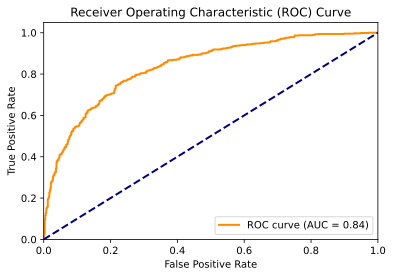

Threshold at Specificity 95.00%: 0.5572
Sensitivity at Specificity 95.00%: 0.4113


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
df2 = pd.read_csv(csv_path, sep=',', low_memory=False)
df2['Final Label'] = df2['Final Label'].replace({'RG': 1, 'NRG': 0})
final_label = df2['Final Label'].values
images = []
labels = []
#count labels
ctnrg = 0
ctrg = 0

true_labels = []
predicted_probabilities = []

# glaucoma_pictures = sorted([f for f in os.listdir(data_path) if f.endswith('.JPG') or f.endswith('.png')])
# glaucoma_pictures=glaucoma_pictures[95000:]
# for image in glaucoma_pictures:
#     image_name2=image[:-4]
#     image_path=data_path+image
#     row = df2[df2['Eye ID'] == image_name2]
#     images.append(image_path)
#     labels.append(row.iloc[0]['Final Label'])
#     if labels[-1] == 0:
#         ctnrg += 1
#     else: ctrg += 1
# test_dataset = GlaucomaDataset(images, labels, transform=val_transform)

model.eval()
#test_loader = DataLoader(test_dataset, batch_size=32)
with torch.no_grad():
    for images,labels in val_loader:
        images=images.to(device)
        outputs=model(images)
        probabilities=torch.sigmoid(outputs)
        true_labels.extend(labels.cpu().numpy())
        predicted_probabilities.extend(probabilities[:, 1].cpu().numpy())
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# Desired specificity
desired_specificity = 0.95

# Find the index of the threshold that is closest to the desired specificity
idx = np.argmax(fpr >= (1 - desired_specificity))

# Get the corresponding threshold
threshold_at_desired_specificity = thresholds[idx]

print(f"Threshold at Specificity {desired_specificity*100:.2f}%: {threshold_at_desired_specificity:.4f}")

# Get the corresponding TPR (sensitivity)
sensitivity_at_desired_specificity = tpr[idx]

print(f"Sensitivity at Specificity {desired_specificity*100:.2f}%: {sensitivity_at_desired_specificity:.4f}")

In [4]:
class GlaucomaDataset_multilabel(Dataset):
    def __init__(self, images, one_hot_labels, transform=None):
        self.images = images
        self.one_hot_labels = one_hot_labels
        self.one_hot_labels = np.array(one_hot_labels).astype(np.int64)
        self.transform = transform
        self.image = []
        if self.transform:
            for i in self.images:
                im = Image.open(i)
                im = self.transform(im)
                self.image.append(im)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        one_hot_encoding = self.one_hot_labels[idx]
        return self.image[idx], torch.from_numpy(one_hot_encoding)

In [5]:
#3data_path = "/Users/chaitanyadua/Downloads/folder4/"#
df = pd.read_csv(csv_path, sep=',', low_memory=False)
# df['Final Label'] = df['Final Label'].replace({'RG': 1, 'NRG': 0})
images = []
one_hot_labels=[]

glaucoma_pictures = sorted([f for f in os.listdir(data_path) if f.endswith('.JPG') or f.endswith('.png')])
for image in glaucoma_pictures:
    image_name2=image[:-4]
    image_path=data_path+image
    row = df[df['Eye ID'] == image_name2]
    if row['Final Label'].values[0]==1:
        images.append(image_path)
        one_hot_labels.append(np.array(row.iloc[0][5:]))
print(len(images))
print(len(one_hot_labels))

3269
3269


In [6]:
train_images, val_images, train_one_hot, val_one_hot = train_test_split(images, one_hot_labels, test_size=0.2)

In [7]:
# Define data transforms
train_transform_multi_label = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.RandomCrop(224, padding=6),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform_multi_label = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_transform_normalised=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
transformed_dataset=GlaucomaDataset_multilabel(train_images,train_one_hot,transform=train_transform_multi_label)
normalised_dataset=GlaucomaDataset_multilabel(train_images,train_one_hot,transform=train_transform_normalised)
val_dataset_multi_label=GlaucomaDataset_multilabel(val_images,val_one_hot,transform=val_transform_multi_label)
'''
val_dataset_multi_label=GlaucomaDataset_multilabel(val_images,val_one_hot,transform=val_transform_multi_label)
# Create data loaders
train_loader_multi_label = DataLoader(combined_dataset, batch_size=32, shuffle=True)
val_loader_multi_label = DataLoader(val_dataset_multi_label, batch_size=32)
for inputs, one in train_loader_multi_label:
    print("Input batch shape:", inputs.dtype)
    print("Labels batch shape:", one.dtype)
    break  # Print only the shape of the first batch'''

'\nval_dataset_multi_label=GlaucomaDataset_multilabel(val_images,val_one_hot,transform=val_transform_multi_label)\n# Create data loaders\ntrain_loader_multi_label = DataLoader(combined_dataset, batch_size=32, shuffle=True)\nval_loader_multi_label = DataLoader(val_dataset_multi_label, batch_size=32)\nfor inputs, one in train_loader_multi_label:\n    print("Input batch shape:", inputs.dtype)\n    print("Labels batch shape:", one.dtype)\n    break  # Print only the shape of the first batch'

In [9]:
class GlaucomaDataset_final(Dataset):
    def __init__(self, images, one_hot_labels, transform=None):
        self.images = images
        self.one_hot_labels = one_hot_labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        one_hot_encoding = self.one_hot_labels[idx]
        return self.images[idx], torch.from_numpy(one_hot_encoding)

In [10]:
total_images=transformed_dataset.image+normalised_dataset.image
total_labels=np.concatenate((transformed_dataset.one_hot_labels,normalised_dataset.one_hot_labels),axis=0)
final_train_dataset=GlaucomaDataset_final(total_images,total_labels,transform=None)

train_loader_multi_label=DataLoader(final_train_dataset,batch_size=32,shuffle=True)

val_loader_multi_label=DataLoader(val_dataset_multi_label,batch_size=32)

for inputs,one in train_loader_multi_label:
    print("Input batch shape:", inputs.dtype)
    print("Labels batch shape:", one.dtype)
    print("Input batch shape:", inputs.shape)
    print("Labels batch shape:", one.shape)
    break
for inputs,one in val_loader_multi_label:
    print("Input batch shape:", inputs.dtype)
    print("Labels batch shape:", one.dtype)
    print("Input batch shape:", inputs.shape)
    print("Labels batch shape:", one.shape)
    break
# Example usage
for inputs,one in train_loader_multi_label:
    print("Labels batch shape:", one)
# print(len(total_images))
# print(len(total_labels))
# print(total_labels[0])

Input batch shape: torch.float32
Labels batch shape: torch.int64
Input batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32, 10])
Input batch shape: torch.float32
Labels batch shape: torch.int64
Input batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32, 10])
Labels batch shape: tensor([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 1, 

In [14]:
def train_model_3(num_epochs,model,train_loader,my_optimizer,loss_criterion,val_loader):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        train_loss=0.0
        val_loss=0.0
        total_precision=0.0
        total_recall=0.0
        batches=0
        total_precision_val=0.0
        total_recall_val=0.0
        batches_val=0
        # custom_threshold=0.5
        for images,labels in train_loader:
            images=images.to(device)
            labels=labels.float().to(device)
            outputs=model(images)
            #outputs is of shape number of samples times number of classes
            loss=loss_criterion(outputs,labels)
            probabilities=torch.sigmoid(outputs)
            predicted_labels = torch.round(probabilities)
            numpy_labels=labels.cpu().detach().numpy()
            numpy_predicted_labels=predicted_labels.cpu().detach().numpy()
            precision = precision_score(numpy_labels, numpy_predicted_labels, average='micro',zero_division=0)
            recall = recall_score(numpy_labels, numpy_predicted_labels, average='micro',zero_division=0)
            my_optimizer.zero_grad()
            loss.backward()
            my_optimizer.step()
            train_loss+=loss.item()*images.shape[0]
            total_precision+=precision
            total_recall+=recall
            batches+=1
        final_precision=total_precision/batches
        final_recall=total_recall/batches

        model.eval()
        with torch.no_grad():
            for images,labels in val_loader:
                images=images.to(device)
                labels=labels.float().to(device)
                outputs=model(images)
                loss=loss_criterion(outputs,labels)
                probabilities_val=torch.sigmoid(outputs)
                predicted_labels_val = torch.round(probabilities_val)
                numpy_labels_val=labels.cpu().detach().numpy()
                numpy_predicted_labels_val=predicted_labels_val.cpu().detach().numpy()
                precision_val = precision_score(numpy_labels_val, numpy_predicted_labels_val, average='micro',zero_division=0)
                recall_val = recall_score(numpy_labels_val, numpy_predicted_labels_val, average='micro',zero_division=0)
                val_loss+=loss.item()*images.shape[0]
                total_precision_val+=precision_val
                total_recall_val+=recall_val
                batches_val+=1
        final_precision_val=total_precision_val/batches_val
        final_recall_val=total_recall_val/batches_val
        print(f'Train Precision: {final_precision:.4f}, Train Recall: {final_recall:.4f}, Val Precision: {final_precision_val:.4f}, Val Recall: {final_recall_val:.4f}')

In [30]:
import torchvision
from torchvision import models
model=models.resnet18(pretrained=False)
#train_model(10,model,train_loader)
for parameter in model.parameters():
    parameter.requires_grad=True
features_last_fc = model.fc.in_features
model.fc=torch.nn.Sequential(
    nn.Linear(features_last_fc,features_last_fc),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(features_last_fc,features_last_fc),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(features_last_fc,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,10),
)
# weights=[1,6]
# weights_tensor=torch.tensor(weights,dtype=torch.float32)
# weights_tensor=weights_tensor.to(device)
criterion = nn.BCEWithLogitsLoss()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model_3(20,model,train_loader_multi_label,optimizer,criterion,val_loader_multi_label)

c:\Users\Shobhit\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shobhit\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [14]:
pth = "C:\\Users\\Shobhit\\Desktop\\IIITacad\\Sem6\\ML_project\\model_one_hot.pth"
torch.save(model.state_dict(), pth)

In [50]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.shape)

conv1.weight torch.Size([64, 3, 7, 7])
bn1.weight torch.Size([64])
bn1.bias torch.Size([64])
layer1.0.conv1.weight torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight torch.Size([64])
layer1.0.bn1.bias torch.Size([64])
layer1.0.conv2.weight torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight torch.Size([64])
layer1.0.bn2.bias torch.Size([64])
layer1.1.conv1.weight torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight torch.Size([64])
layer1.1.bn1.bias torch.Size([64])
layer1.1.conv2.weight torch.Size([64, 64, 3, 3])
layer1.1.bn2.weight torch.Size([64])
layer1.1.bn2.bias torch.Size([64])
layer2.0.conv1.weight torch.Size([128, 64, 3, 3])
layer2.0.bn1.weight torch.Size([128])
layer2.0.bn1.bias torch.Size([128])
layer2.0.conv2.weight torch.Size([128, 128, 3, 3])
layer2.0.bn2.weight torch.Size([128])
layer2.0.bn2.bias torch.Size([128])
layer2.0.downsample.0.weight torch.Size([128, 64, 1, 1])
layer2.0.downsample.1.weight torch.Size([128])
layer2.0.downsample.1.bias torch.Size([128])
layer2.1.conv1.weight tor